In [1]:
#Including  Libraries 
import os 
import re
import glob
import numpy as np
import librosa
import librosa.display
import IPython.display 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils



In [2]:
# Including Datasets 
crema_path='archive/Crema'
ravdess_path='archive/Ravdess/audio_speech_actors_01-24'
savee_path='archive/Savee'
tess_path='archive/Tess'

In [3]:
crema=[]
for wav in os.listdir(crema_path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',crema_path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',crema_path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',crema_path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',crema_path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',crema_path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',crema_path+'/'+wav))
    else:
        crema.append(('unknown',crema_path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)

In [4]:
Crema_df.head(2)

,Emotion,File_Path
0,angry,archive/Crema/1001_DFA_ANG_XX.wav
1,disgust,archive/Crema/1001_DFA_DIS_XX.wav


In [5]:
ravdess=[]
for directory in os.listdir(ravdess_path):
    actors=os.listdir(os.path.join(ravdess_path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(ravdess_path,directory,wav)))
        


In [6]:
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head(2)

,Emotion,File_Path
0,neutral,archive/Ravdess/audio_speech_actors_01-24\Acto...
1,neutral,archive/Ravdess/audio_speech_actors_01-24\Acto...


In [7]:
savee=[]
for wav in os.listdir(savee_path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',savee_path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',savee_path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',savee_path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',savee_path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',savee_path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',savee_path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',savee_path+'/'+wav))

In [8]:
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head(2)

,Emotion,File_Path
0,angry,archive/Savee/DC_a01.wav
1,angry,archive/Savee/DC_a02.wav


In [9]:
tess=[]
for directory in os.listdir(tess_path):
    for wav in os.listdir(os.path.join(tess_path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(tess_path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(tess_path,directory,wav)))

In [10]:
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head(2)

,Emotion,File_Path
0,angry,archive/Tess\OAF_angry\OAF_back_angry.wav
1,angry,archive/Tess\OAF_angry\OAF_bar_angry.wav


In [11]:
df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)

In [12]:
df.head(2)

,Emotion,File_Path
0,angry,archive/Crema/1001_DFA_ANG_XX.wav
1,disgust,archive/Crema/1001_DFA_DIS_XX.wav


In [13]:
df.shape

(12162, 2)

In [14]:
# 
audio_arrays = []

for i in df['File_Path']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
df['audio_data'] = audio_arrays


In [15]:
df.head(5)

,Emotion,File_Path,audio_data
0,angry,archive/Crema/1001_DFA_ANG_XX.wav,"[6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4..."
1,disgust,archive/Crema/1001_DFA_DIS_XX.wav,"[0.00083351025, 0.0011382565, 0.0012377766, 0...."
2,fear,archive/Crema/1001_DFA_FEA_XX.wav,"[0.007539533, 0.009629492, 0.008980679, 0.0084..."
3,happy,archive/Crema/1001_DFA_HAP_XX.wav,"[-0.0039882455, -0.004723385, -0.0038926, -0.0..."
4,neutral,archive/Crema/1001_DFA_NEU_XX.wav,"[0.0022234665, 0.002518577, 0.001856927, 0.001..."


In [16]:
datafram_audio=df
datafram_audio=datafram_audio.loc[((datafram_audio['Emotion']=='fear')|(datafram_audio['Emotion']=='sad')|(datafram_audio['Emotion']=='angry')|(datafram_audio['Emotion']=='happy')|(datafram_audio['Emotion']=='neutral'))]

In [17]:
datafram_audio

,Emotion,File_Path,audio_data
0,angry,archive/Crema/1001_DFA_ANG_XX.wav,"[6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4..."
2,fear,archive/Crema/1001_DFA_FEA_XX.wav,"[0.007539533, 0.009629492, 0.008980679, 0.0084..."
3,happy,archive/Crema/1001_DFA_HAP_XX.wav,"[-0.0039882455, -0.004723385, -0.0038926, -0.0..."
4,neutral,archive/Crema/1001_DFA_NEU_XX.wav,"[0.0022234665, 0.002518577, 0.001856927, 0.001..."
5,sad,archive/Crema/1001_DFA_SAD_XX.wav,"[0.0025660694, 0.003113736, 0.0027049216, 0.00..."
...,...,...,...
2795,sad,archive/Tess\YAF_sad\YAF_witch_sad.wav,"[9.976087e-06, -7.548586e-05, -0.00029991067, ..."
2796,sad,archive/Tess\YAF_sad\YAF_yearn_sad.wav,"[0.00010657309, 0.00017711744, 0.00052824983, ..."
2797,sad,archive/Tess\YAF_sad\YAF_yes_sad.wav,"[0.00016712552, 0.00029902434, 0.0003929163, 0..."
2798,sad,archive/Tess\YAF_sad\YAF_young_sad.wav,"[-5.101261e-05, -6.6238354e-06, 0.0002291586, ..."


In [18]:
datafram_audio.loc[datafram_audio['Emotion']=='fear','Emotion']='dangers'
datafram_audio.loc[datafram_audio['Emotion']=='sad','Emotion']='dangers'
datafram_audio.loc[datafram_audio['Emotion']=='angry','Emotion']='dangers'
datafram_audio.loc[datafram_audio['Emotion']=='happy','Emotion']='neutral'
datafram_audio.loc[datafram_audio['Emotion']=='neutral','Emotion']='neutral'

C:\Users\96650\AppData\Local\Temp\ipykernel_26104\1614200900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafram_audio.loc[datafram_audio['Emotion']=='fear','Emotion']='dangers'
C:\Users\96650\AppData\Local\Temp\ipykernel_26104\1614200900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafram_audio.loc[datafram_audio['Emotion']=='sad','Emotion']='dangers'
C:\Users\96650\AppData\Local\Temp\ipykernel_26104\1614200900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [19]:
datafram_audio

,Emotion,File_Path,audio_data
0,dangers,archive/Crema/1001_DFA_ANG_XX.wav,"[6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4..."
2,dangers,archive/Crema/1001_DFA_FEA_XX.wav,"[0.007539533, 0.009629492, 0.008980679, 0.0084..."
3,neutral,archive/Crema/1001_DFA_HAP_XX.wav,"[-0.0039882455, -0.004723385, -0.0038926, -0.0..."
4,neutral,archive/Crema/1001_DFA_NEU_XX.wav,"[0.0022234665, 0.002518577, 0.001856927, 0.001..."
5,dangers,archive/Crema/1001_DFA_SAD_XX.wav,"[0.0025660694, 0.003113736, 0.0027049216, 0.00..."
...,...,...,...
2795,dangers,archive/Tess\YAF_sad\YAF_witch_sad.wav,"[9.976087e-06, -7.548586e-05, -0.00029991067, ..."
2796,dangers,archive/Tess\YAF_sad\YAF_yearn_sad.wav,"[0.00010657309, 0.00017711744, 0.00052824983, ..."
2797,dangers,archive/Tess\YAF_sad\YAF_yes_sad.wav,"[0.00016712552, 0.00029902434, 0.0003929163, 0..."
2798,dangers,archive/Tess\YAF_sad\YAF_young_sad.wav,"[-5.101261e-05, -6.6238354e-06, 0.0002291586, ..."


# Visualising Data

In [20]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')

In [21]:
def display_waveform(data ,sr ,emotion):
  plt.figure()
  plt.title(f'Waveplot for {emotion}')
  librosa.display.waveplot(data, sr=sr)
  plt.show()

In [24]:
danfile = datafram_audio[datafram_audio['Emotion'] == 'dangers']['File_Path']
danarray = datafram_audio[datafram_audio['Emotion'] == 'dangers']['audio_data']
IPython.display.Audio(danfile.iloc[0])




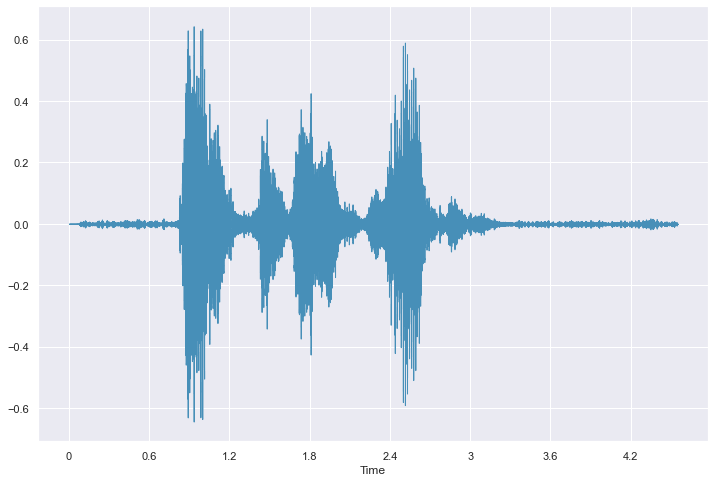

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [25]:
librosa.display.waveshow(danarray.iloc[0], color='#478FB8')

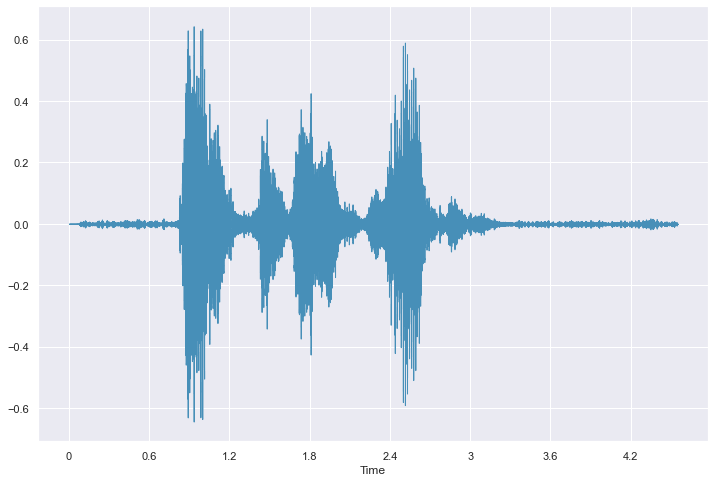

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [26]:
neutfile = datafram_audio[datafram_audio['Emotion'] == 'neutral']['File_Path']
neutarray = datafram_audio[datafram_audio['Emotion'] == 'neutral']['audio_data']
IPython.display.Audio(neutfile.iloc[0])


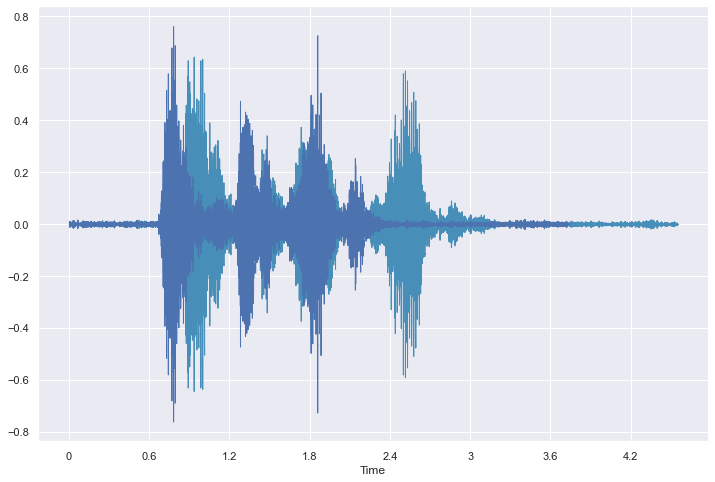

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [27]:


librosa.display.waveshow(neutarray.iloc[0])

# Audio Augmentation 
- add noise 


# Data Augmentation

In [20]:

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def pitch(data):
    return librosa.effects.pitch_shift(data,sr=44100,n_steps=0.7)


In [21]:
a_list=[]
for i in range(len(datafram_audio)):
    audio_data=noise(datafram_audio['audio_data'].iloc[i]);
    audio_augmentation=noise(audio_data)
    audio_augmentation=pitch(audio_augmentation)
    a_list.append(audio_augmentation)
 

In [22]:
datafram_audio.insert(3,'audio_aug',a_list)

In [23]:
datafram_audio.head(3)

,Emotion,File_Path,audio_data,audio_aug
0,dangers,archive/Crema/1001_DFA_ANG_XX.wav,"[6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4...","[-0.015222580172121525, -0.004130274523049593,..."
2,dangers,archive/Crema/1001_DFA_FEA_XX.wav,"[0.007539533, 0.009629492, 0.008980679, 0.0084...","[0.044986460357904434, 0.01065505389124155, 0...."
3,neutral,archive/Crema/1001_DFA_HAP_XX.wav,"[-0.0039882455, -0.004723385, -0.0038926, -0.0...","[0.0034190563019365072, -0.028772739693522453,..."


# Extracting Features

In [24]:
def extract_features(data):
    
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))     
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))
    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    result = np.hstack((result, tonnetz));
    
    return result
    

In [25]:
warnings.filterwarnings('ignore')

x = []
y = []
for i in range(len(datafram_audio)):
    feature=extract_features(datafram_audio['audio_aug'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(datafram_audio['Emotion'].iloc[i])

In [26]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.1)

In [28]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((1440926,), (1440926, 2), (160103,), (160103, 2))


In [30]:
import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

In [31]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[0], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0005),
             metrics=['accuracy'])
model.summary()

ResourceExhaustedError: OOM when allocating tensor with shape[1475500032,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:RandomUniform]